In [24]:
import numpy as np
from keras.preprocessing import image
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from pathlib import Path
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import GridSearchCV, train_test_split,KFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from skimage.io import imread
print("Files imported successfully")
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 30*30 + 1)
import seaborn as sns
import cv2
import tensorflow as tf
from tqdm import tqdm
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
import glob
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
for dirname, _, filenames in os.walk(r'.\AMLS-2021_dataset\dataset\smoothen_image'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Files imported successfully
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0000.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0001.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0002.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0003.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0004.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0005.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0006.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0007.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0008.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0009.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0010.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0011.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0012.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0013.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0014.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0015.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\I

.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_2246.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_2247.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_2248.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_2249.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_2250.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_2251.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_2252.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_2253.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_2254.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_2255.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_2256.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_2257.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_2258.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_2259.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_2260.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_2261.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_2262.jpg
.\AMLS-2021_da

# Import image

In [25]:
image_size = 128
def importjpg(jpgfile,X):
    #img = cv2.imread(jpgfile,0)
    img = cv2.imread(jpgfile,0)
    img = cv2.resize(img,(image_size, image_size))
    img = np. array(img)
    img = img / 255
    #img = img.flatten()
    X.append(img)


    
# X dataset
X = []
for jpgfile in glob.glob(r"./AMLS-2021_dataset/dataset/smoothen_image/*.jpg"):
    importjpg(jpgfile,X)
X = np. array(X)
print(X.shape)

# flatten X dataset
X_flatten = []
for img in X:
    img = img.flatten()
    X_flatten.append(img)
X_flatten = np. array(X_flatten)  
print(X_flatten.shape)


(3000, 128, 128)
(3000, 16384)


# Import label

In [26]:
data_csv = pd.read_csv ('C:\\Users\\hsia_\\Desktop\\AMLS-2021_dataset\\dataset\\label.csv')
print (data_csv)

Y_binary = pd.DataFrame(data_csv, columns= ['tumor_or_not'])
Y_binary = np.array(Y_binary)
Y_binary = Y_binary.flatten()
print(Y_binary)


Y_multi = pd.DataFrame(data_csv, columns= ['label'])
Y_multi = np.array(Y_multi)
Y_multi = Y_multi.flatten()
print(Y_multi)

           file_name       label  tumor_or_not  Tumor_type
0     IMAGE_0000.jpg  meningioma             1           1
1     IMAGE_0001.jpg          no             0           0
2     IMAGE_0002.jpg  meningioma             1           1
3     IMAGE_0003.jpg      glioma             1           2
4     IMAGE_0004.jpg  meningioma             1           1
...              ...         ...           ...         ...
2995  IMAGE_2995.jpg          no             0           0
2996  IMAGE_2996.jpg  meningioma             1           1
2997  IMAGE_2997.jpg      glioma             1           2
2998  IMAGE_2998.jpg      glioma             1           2
2999  IMAGE_2999.jpg   pituitary             1           3

[3000 rows x 4 columns]
[1 0 1 ... 1 1 1]
['meningioma' 'no' 'meningioma' ... 'glioma' 'glioma' 'pituitary']


# Split data

In [43]:
X_t, X_test, Y_train, Y_test = train_test_split(X, Y_binary, random_state=101, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, random_state=101, test_size=0.5)
#Scale Data Images
scaler = StandardScaler()
X_train = scaler.fit_transform([i.flatten() for i in X_t])
X_test = scaler.fit_transform([i.flatten() for i in X_test])
X_val = scaler.fit_transform([i.flatten() for i in X_val])
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(2400, 16384)
(300, 16384)
(300, 16384)


# Using PCA (n=2)

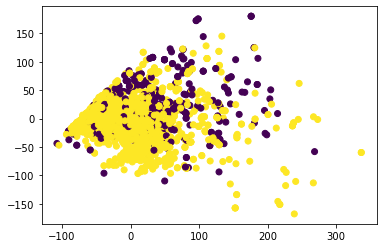

In [28]:
pca_2D = PCA(n_components=2)
dataIn2D = pca_2D.fit_transform(X_train)

dataIn2D_X=[]
dataIn2D_Y=[]
for (x,y) in dataIn2D:
    dataIn2D_X.append(x)
    dataIn2D_Y.append(y)
    #print(x,y)
    
plt.scatter(dataIn2D_X,dataIn2D_Y,c=Y_train)



# Using PCA(n=3)

Text(0.5, 0, 'Z Label')

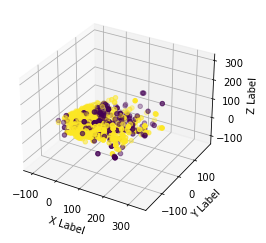

In [29]:
pca_3D = PCA(n_components=3)
dataIn3D = pca_3D.fit_transform(X_train)

dataIn3D_X=[]
dataIn3D_Y=[]
dataIn3D_Z=[]
for (x,y,z) in dataIn3D:
    dataIn3D_X.append(x)
    dataIn3D_Y.append(y)
    dataIn3D_Z.append(z)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataIn3D_X,dataIn3D_Y,dataIn3D_Z,c=Y_train)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Image after feature reduction using PCA

In [30]:
def computePCA(n, im_scaled, image_id):
    pca = PCA(n)
    principalComponents = pca.fit_transform(im_scaled)
    im_reduced = pca.inverse_transform(principalComponents)
    newImage = scaler.inverse_transform(im_reduced[image_id])
    return newImage
def showPCA(image,X2, X10, X50):
    fig = plt.figure(figsize=(15,15))
    ax1 = fig.add_subplot(1,4,1)
    ax1.axis('off')
    ax1.set_title('Original image')
    plt.imshow(image,cmap='gray')
    ax1 = fig.add_subplot(1,4,2)
    ax1.axis('off') 
    ax1.set_title('183 PC')
    plt.imshow(X50,cmap='gray')
    ax1 = fig.add_subplot(1,4,3)
    ax1.axis('off') 
    ax1.set_title('33 PC')
    plt.imshow(X10,cmap='gray')
    ax2 = fig.add_subplot(1,4,4)
    ax2.axis('off') 
    ax2.set_title('2 PC')
    plt.imshow(X2,cmap='gray')
    plt.show()

(128, 128)
(16384,)
(16384,)
(16384,)


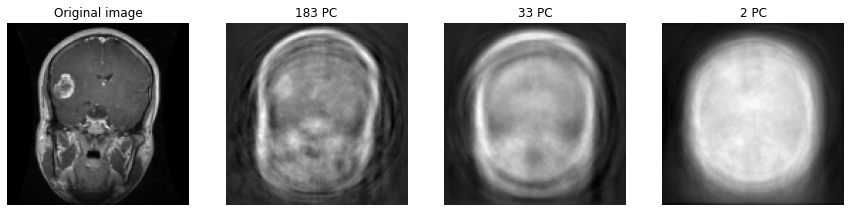

In [35]:
image_id = 94
image = X_t[image_id]
#Compute PCA
X_2 = computePCA(2, X_train,image_id)
X_50 = computePCA(33, X_train,image_id)
X_100 = computePCA(183, X_train,image_id)
print(image.shape)
print(X_2.shape)
print(X_50.shape)
print(X_100.shape)

dim = 128
#Reshape in order to plot images
X2 = np.reshape(X_2, (dim,dim)).astype(float)
X50 = np.reshape(X_50, (dim,dim)).astype(float)
X100 = np.reshape(X_100, (dim,dim)).astype(float)

#Plot
showPCA(image, X2, X50, X100)

# Using SVM without feature reduction

## Finding the best gamma from (0.0001,0.001,0.01)

acc =0.95 using SVM with kernel


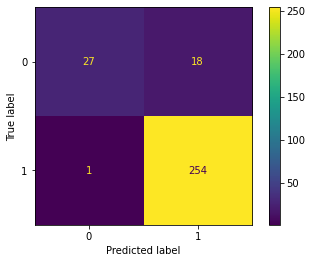

In [44]:
svm_with_kernel = SVC(gamma=0.0001, kernel='rbf', probability=True)
svm_with_kernel.fit(X_train, Y_train) 
Y_pred_val = svm_with_kernel.predict(X_val)
print("acc ="+str(svm_with_kernel.score(X_val, Y_val))+" using SVM with kernel")
plot_confusion_matrix(svm_with_kernel, X_test, Y_test)  
plt.show()

(200, 16384)
(200, 16384)
(200,)
Accuracy with Not-Linear SVM : 84.00%


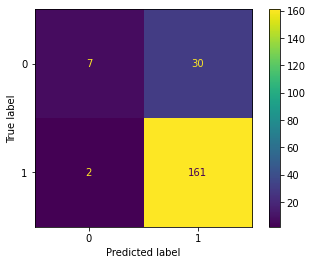

In [45]:

# X dataset
X_trail = []
for jpgfile in glob.glob(r".\AMLS-2021_test\test\image\*.jpg"):
    importjpg(jpgfile,X_trail)
X_trail = np. array(X_trail)



X_flatten_trail = []
for img in X_trail:
    img = img.flatten()
    X_flatten_trail.append(img)
X_flatten_trail = np. array(X_flatten_trail)  
print(X_flatten_trail.shape)

#X_trail = np.reshape(X_trail, (X_trail.shape[0], -1))
print(X_flatten_trail.shape)

data_csv_trail = pd.read_csv (r'.\AMLS-2021_test\test\label.csv')
#print (data_csv_trail)

Y_binary_trail = pd.DataFrame(data_csv_trail, columns= ['tumor_or_not'])
Y_binary_trail = np.array(Y_binary_trail)
Y_binary_trail = Y_binary_trail.flatten()
print(Y_binary_trail.shape)


Y_pred = svm_with_kernel.predict(X_flatten_trail)
precision = metrics.accuracy_score(Y_pred, Y_binary_trail) * 100
print("Accuracy with Not-Linear SVM : {0:.2f}%".format(precision))

plot_confusion_matrix(svm_with_kernel, X_flatten_trail, Y_binary_trail)  
plt.show()

acc =0.93 using SVM with kernel


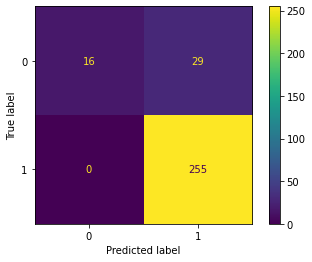

In [8]:
svm_with_kernel = SVC(gamma=0.001, kernel='rbf', probability=True)
svm_with_kernel.fit(X_train, Y_train) 
Y_pred_val = svm_with_kernel.predict(X_val)
print("acc ="+str(svm_with_kernel.score(X_val, Y_val))+" using SVM with kernel")
plot_confusion_matrix(svm_with_kernel, X_test, Y_test)  
plt.show()

acc =0.8766666666666667 using SVM with kernel


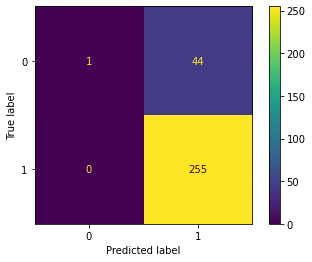

In [9]:
svm_with_kernel = SVC(gamma=0.01, kernel='rbf', probability=True)
svm_with_kernel.fit(X_train, Y_train) 
Y_pred_val = svm_with_kernel.predict(X_val)
print("acc ="+str(svm_with_kernel.score(X_val, Y_val))+" using SVM with kernel")
plot_confusion_matrix(svm_with_kernel, X_test, Y_test)  
plt.show()

# Using PCA and SVM kernel

Using SKLEARN & validation dataset with SVM kernel


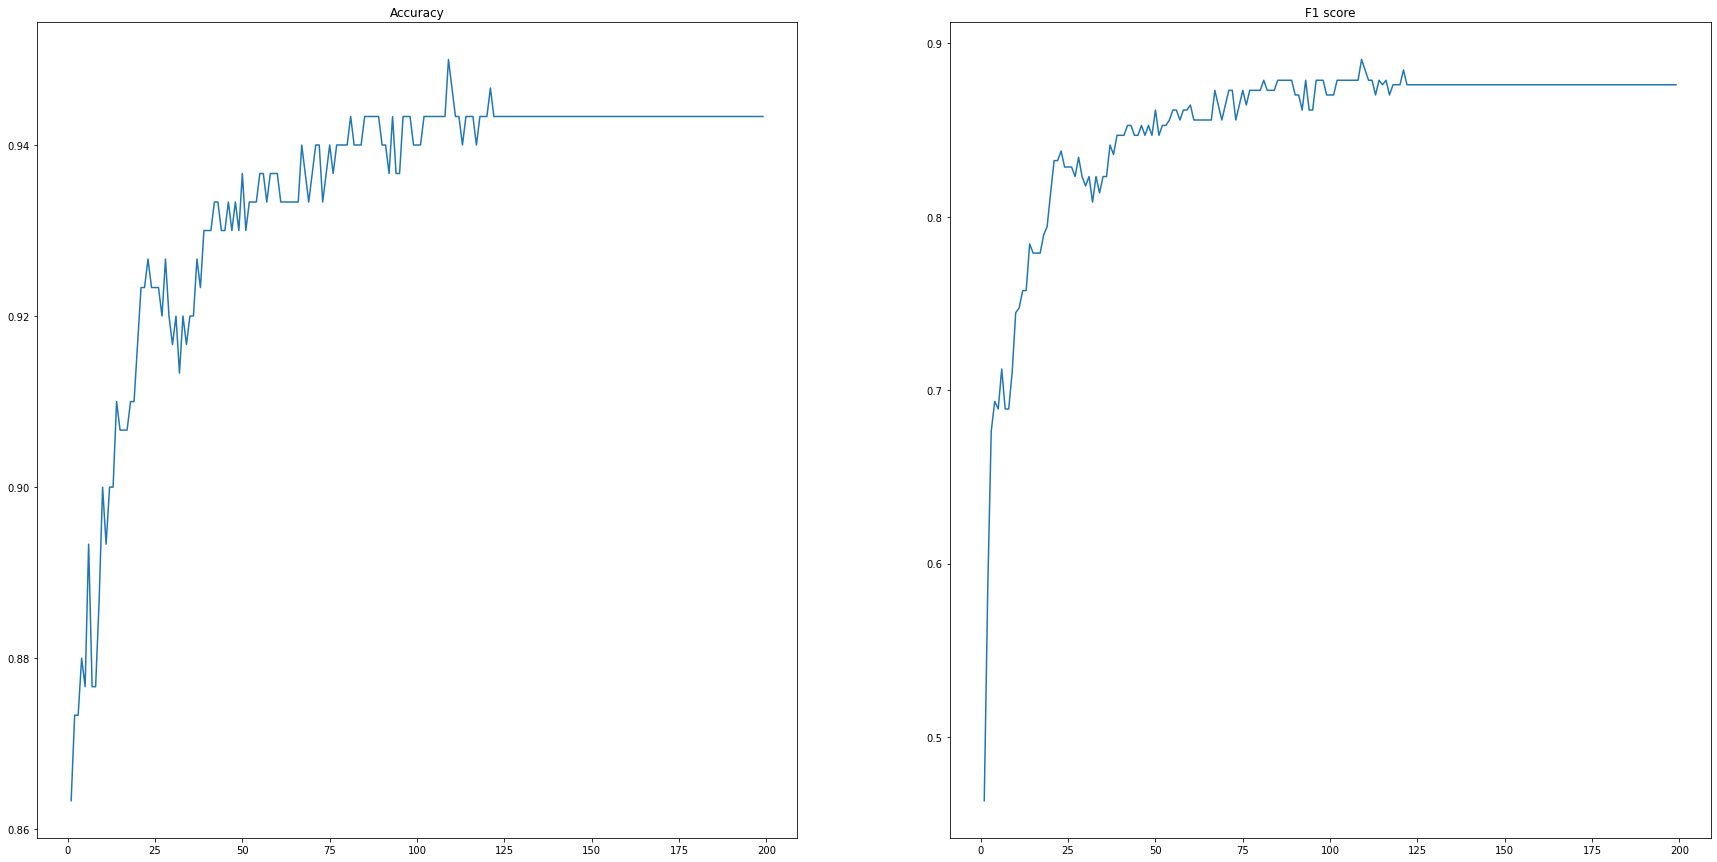

max acc at n=109 acc of 0.95
max acc at n=109 f1 of 0.8906678976651522


In [12]:
print("Using SKLEARN & validation dataset with SVM kernel")
SVM_valid_x = []
SVM_valid_y_acc = []
SVM_valid_y_f1 = []
index_acc=0
index_f1=0
acc=0
f1=0

for k in range(1, 200):
    pca = PCA(k)
    X_train_PCA = pca.fit_transform(X_train)
    X_val_PCA = pca.transform(X_val)
    svm_with_kernel = SVC(gamma=0.0001, kernel='rbf', probability=True)
    svm_with_kernel.fit(X_train_PCA, Y_train) 
    Y_pred_val = svm_with_kernel.predict(X_val_PCA)
    SVM_valid_y_f1.append(f1_score(Y_val, Y_pred_val, average='macro'))
    SVM_valid_y_acc.append(svm_with_kernel.score(X_val_PCA, Y_val))
    if SVM_valid_y_acc[k-1]>acc:
        acc=SVM_valid_y_acc[k-1]
        index_acc=k-1
    if SVM_valid_y_f1[k-1]>f1:
        f1=SVM_valid_y_f1[k-1]
        index_f1=k-1        
    
    SVM_valid_x.append(k)

fig = plt.figure(figsize=(30,15))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Accuracy')
plt.plot(SVM_valid_x, SVM_valid_y_acc)
ax1 = fig.add_subplot(1,2,2) 
ax1.set_title('F1 score')
plt.plot(SVM_valid_x, SVM_valid_y_f1)
plt.show()

print("max acc at n="+str(index_acc+1)+" acc of "+str(acc))
print("max acc at n="+str(index_f1+1)+" f1 of "+str(f1))

(2400, 109)
(300, 109)
Accuracy with Not-Linear SVM considering 109PC: 96.33%


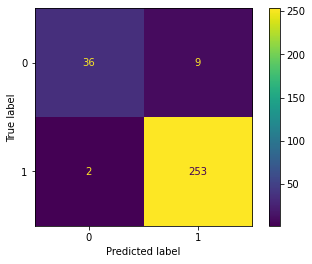

In [13]:
pca = PCA(109)
X_train109D = pca.fit_transform(X_train)
X_val109D = pca.transform(X_val)
X_test109D = pca.transform(X_test)
print(X_train109D.shape)
print(X_val109D.shape)

svm_with_kernel = SVC(gamma=0.0001, kernel='rbf', probability=True)
svm_with_kernel.fit(X_train109D, Y_train) 


Y_pred = svm_with_kernel.predict(X_test109D)
precision = metrics.accuracy_score(Y_pred, Y_test) * 100
print("Accuracy with Not-Linear SVM considering 109PC: {0:.2f}%".format(precision))

plot_confusion_matrix(svm_with_kernel, X_test109D, Y_test)  
plt.show()

# Test the model

In [14]:

# X dataset
X_trail = []
for jpgfile in glob.glob(r".\AMLS-2021_test\test\image\*.jpg"):
    importjpg(jpgfile,X_trail)
X_trail = np. array(X_trail)



X_flatten_trail = []
for img in X_trail:
    img = img.flatten()
    X_flatten_trail.append(img)
X_flatten_trail = np. array(X_flatten_trail)  
print(X_flatten_trail.shape)

#X_trail = np.reshape(X_trail, (X_trail.shape[0], -1))
print(X_flatten_trail.shape)

(200, 16384)
(200, 16384)


In [15]:
data_csv_trail = pd.read_csv (r'.\AMLS-2021_test\test\label.csv')
#print (data_csv_trail)

Y_binary_trail = pd.DataFrame(data_csv_trail, columns= ['tumor_or_not'])
Y_binary_trail = np.array(Y_binary_trail)
Y_binary_trail = Y_binary_trail.flatten()
print(Y_binary_trail.shape)


(200,)


(200, 109)
Accuracy with Not-Linear SVM considering 109PC: 85.50%


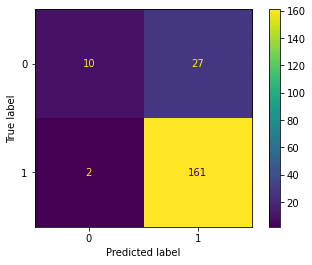

In [16]:
X_trail109D = pca.transform(X_flatten_trail)
print(X_trail109D.shape)

Y_pred = svm_with_kernel.predict(X_trail109D)
precision = metrics.accuracy_score(Y_pred, Y_binary_trail) * 100
print("Accuracy with Not-Linear SVM considering 109PC: {0:.2f}%".format(precision))

plot_confusion_matrix(svm_with_kernel, X_trail109D, Y_binary_trail)  
plt.show()

# Multi classification

In [37]:
X_t, X_test, Y_train, Y_test = train_test_split(X, Y_multi, random_state=101, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, random_state=101, test_size=0.5)
#Scale Data Images
scaler = StandardScaler()
X_train = scaler.fit_transform([i.flatten() for i in X_t])
X_test = scaler.fit_transform([i.flatten() for i in X_test])
X_val = scaler.fit_transform([i.flatten() for i in X_val])
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(2400, 16384)
(300, 16384)
(300, 16384)


## Without PCA

acc =0.8366666666666667 using SVM with kernel


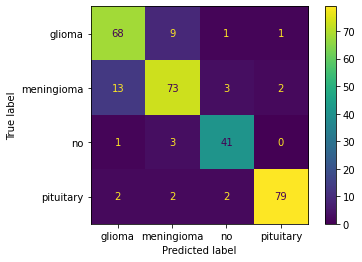

In [38]:
svm_with_kernel = SVC(gamma=0.0001, kernel='rbf', probability=True)
svm_with_kernel.fit(X_train, Y_train) 
Y_pred_val = svm_with_kernel.predict(X_val)
print("acc ="+str(svm_with_kernel.score(X_val, Y_val))+" using SVM with kernel")
plot_confusion_matrix(svm_with_kernel, X_test, Y_test)  
plt.show()

(200, 16384)
(200, 16384)
(200,)
Accuracy with Not-Linear SVM: 46.00%


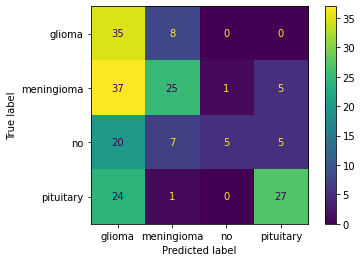

In [41]:

# X dataset
X_trail = []
for jpgfile in glob.glob(r".\AMLS-2021_test\test\image\*.jpg"):
    importjpg(jpgfile,X_trail)
X_trail = np. array(X_trail)



X_flatten_trail = []
for img in X_trail:
    img = img.flatten()
    X_flatten_trail.append(img)
X_flatten_trail = np. array(X_flatten_trail)  
print(X_flatten_trail.shape)

#X_trail = np.reshape(X_trail, (X_trail.shape[0], -1))
print(X_flatten_trail.shape)

data_csv_trail = pd.read_csv (r'.\AMLS-2021_test\test\label.csv')
#print (data_csv_trail)

Y_multi_trail = pd.DataFrame(data_csv_trail, columns= ['label'])
Y_multi_trail = np.array(Y_multi_trail)
Y_multi_trail = Y_multi_trail.flatten()
print(Y_multi_trail.shape)


Y_pred = svm_with_kernel.predict(X_flatten_trail)
precision = metrics.accuracy_score(Y_pred, Y_multi_trail) * 100
print("Accuracy with Not-Linear SVM: {0:.2f}%".format(precision))

plot_confusion_matrix(svm_with_kernel, X_flatten_trail, Y_multi_trail)  
plt.show()


Using SKLEARN & validation dataset with SVM kernel


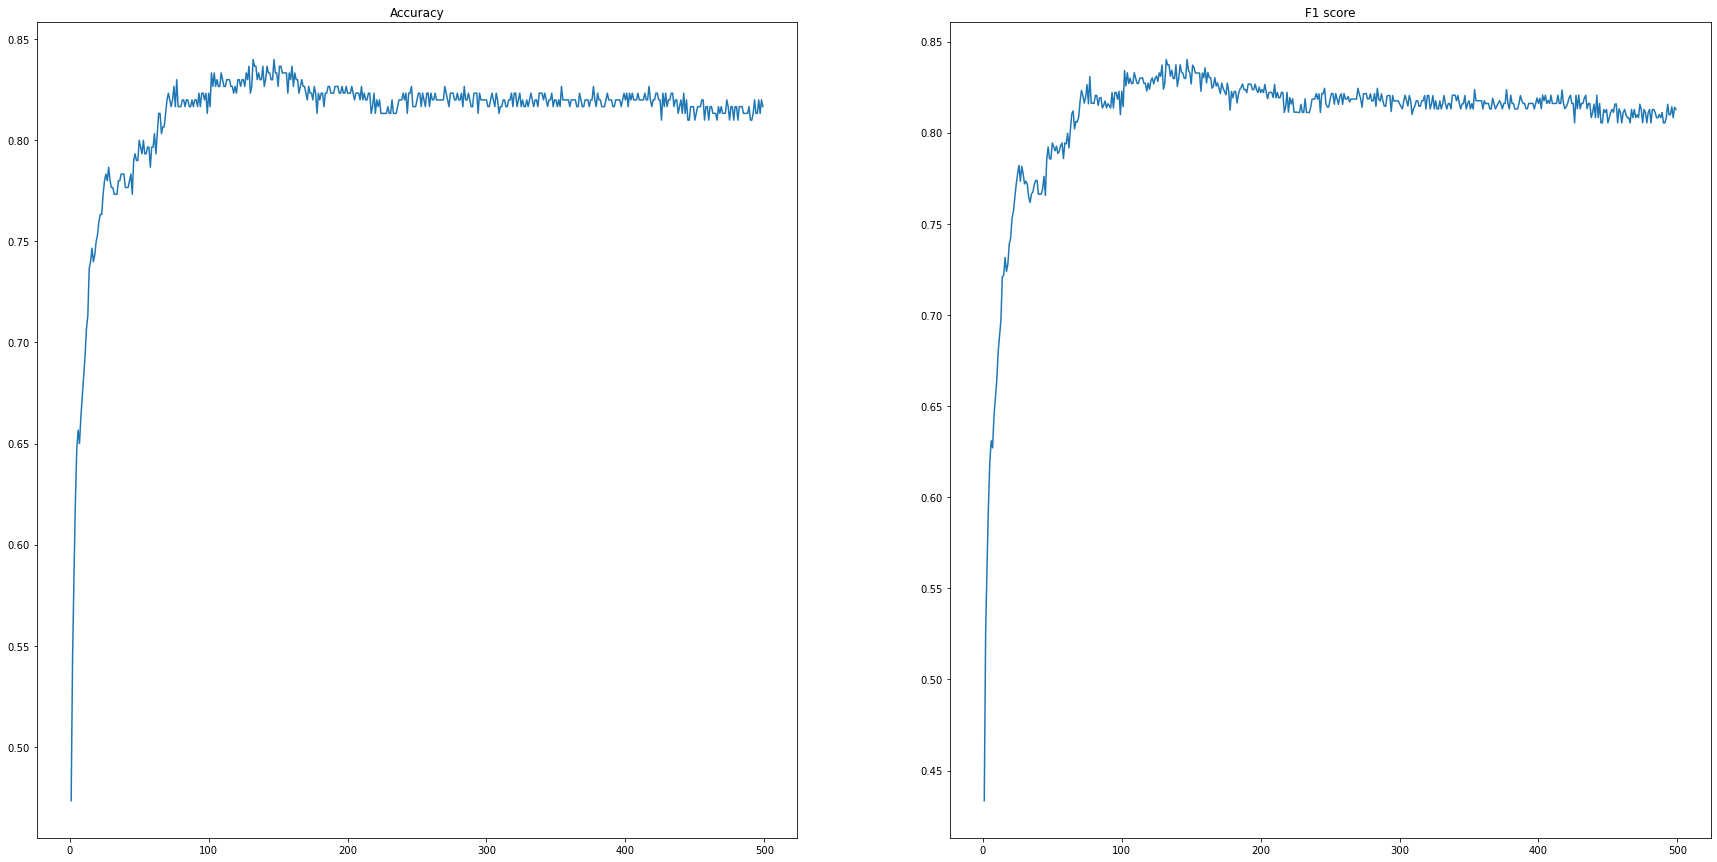

max acc at n=132 acc of 0.84
max acc at n=147 f1 of 0.8401805327294185


In [18]:
print("Using SKLEARN & validation dataset with SVM kernel")
SVM_valid_x = []
SVM_valid_y_acc = []
SVM_valid_y_f1 = []
index_acc=0
index_f1=0
acc=0
f1=0

for k in range(1, 500):
    pca = PCA(k)
    X_train_PCA = pca.fit_transform(X_train)
    X_val_PCA = pca.transform(X_val)
    svm_with_kernel = SVC(gamma=0.0001, kernel='rbf', probability=True)
    svm_with_kernel.fit(X_train_PCA, Y_train) 
    Y_pred_val = svm_with_kernel.predict(X_val_PCA)
    SVM_valid_y_f1.append(f1_score(Y_val, Y_pred_val, average='macro'))
    SVM_valid_y_acc.append(svm_with_kernel.score(X_val_PCA, Y_val))
    if SVM_valid_y_acc[k-1]>acc:
        acc=SVM_valid_y_acc[k-1]
        index_acc=k-1
    if SVM_valid_y_f1[k-1]>f1:
        f1=SVM_valid_y_f1[k-1]
        index_f1=k-1        
    
    SVM_valid_x.append(k)

fig = plt.figure(figsize=(30,15))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Accuracy')
plt.plot(SVM_valid_x, SVM_valid_y_acc)
ax1 = fig.add_subplot(1,2,2) 
ax1.set_title('F1 score')
plt.plot(SVM_valid_x, SVM_valid_y_f1)
plt.show()

print("max acc at n="+str(index_acc+1)+" acc of "+str(acc))
print("max acc at n="+str(index_f1+1)+" f1 of "+str(f1))

(2400, 147)
(300, 147)
Accuracy with Not-Linear SVM considering 147PC: 87.67%


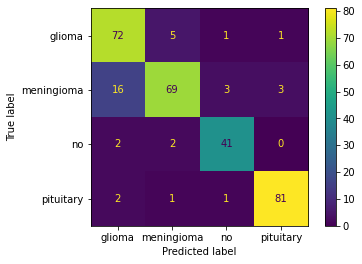

In [19]:
pca = PCA(147)
X_train147D = pca.fit_transform(X_train)
X_val147D = pca.transform(X_val)
X_test147D = pca.transform(X_test)
print(X_train147D.shape)
print(X_val147D.shape)

svm_with_kernel = SVC(gamma=0.0001, kernel='rbf', probability=True)
svm_with_kernel.fit(X_train147D, Y_train) 


Y_pred = svm_with_kernel.predict(X_test147D)
precision = metrics.accuracy_score(Y_pred, Y_test) * 100
print("Accuracy with Not-Linear SVM considering 147PC: {0:.2f}%".format(precision))

plot_confusion_matrix(svm_with_kernel, X_test147D, Y_test)  
plt.show()

# Test the model

In [21]:

# X dataset
X_trail = []
for jpgfile in glob.glob(r".\AMLS-2021_test\test\image\*.jpg"):
    importjpg(jpgfile,X_trail)
X_trail = np. array(X_trail)



X_flatten_trail = []
for img in X_trail:
    img = img.flatten()
    X_flatten_trail.append(img)
X_flatten_trail = np. array(X_flatten_trail)  
print(X_flatten_trail.shape)

#X_trail = np.reshape(X_trail, (X_trail.shape[0], -1))
print(X_flatten_trail.shape)

(200, 16384)
(200, 16384)


In [22]:
data_csv_trail = pd.read_csv (r'.\AMLS-2021_test\test\label.csv')
#print (data_csv_trail)

Y_multi_trail = pd.DataFrame(data_csv_trail, columns= ['label'])
Y_multi_trail = np.array(Y_multi_trail)
Y_multi_trail = Y_multi_trail.flatten()
print(Y_multi_trail.shape)


(200,)


(200, 147)
Accuracy with Not-Linear SVM considering 147PC: 34.50%


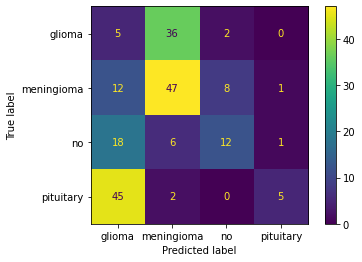

In [23]:
X_trail147D = pca.transform(X_flatten_trail)
print(X_trail147D.shape)

Y_pred = svm_with_kernel.predict(X_trail147D)
precision = metrics.accuracy_score(Y_pred, Y_multi_trail) * 100
print("Accuracy with Not-Linear SVM considering 147PC: {0:.2f}%".format(precision))

plot_confusion_matrix(svm_with_kernel, X_trail147D, Y_multi_trail)  
plt.show()